In [ ]:
options(repr.plot.width = 8 , repr.plot.height = 5)

In [2]:
install.packages('nycflights13')
install.packages('babynames')
install.packages('Lahman')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Lecture 3: Advanced data transformations and pipelines

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Use the skills that we learned last week to do advanced data analysis
* Construct pipelines of data transformations
    
This lecture note corresponds to Chapters 4 and 5 of your book.
</div>

In [3]:
# packages we will be using in today's lecture:
library(tidyverse)  # always!
library(nycflights13)
library(Lahman)  
library(babynames)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Review of week 2
Last lecture we learned how to alter the rows and columns of a dataframe:
- `filter()` to keep certain rows that satisfy logical conditions.
- `arrange()` to sort rows according to certain column values.
- `distinct()` to keep only rows that are distinct on some combination of columns.
- `select()` to drop/rename/rearrange columns
- `group_by()` to tell R how your data are grouped
- `summarize()` to create summary tables of your (grouped) data

## The pipe (`%>%`) operator

![pipes](https://i0.wp.com/www.rforecology.com/pipes_image0.png?zoom=2&w=578&ssl=1)

`%>%` (pronounced: "pipe") works by taking the **output** from the left-hand side, and feeding it in as the **input** on the right-hand side:

<div style="margin: 0 auto; padding: 50px; font-size: 36px">
    <code style="background: lightgreen; padding: 5px">output</code>
    <code> %&gt;% </code>
    <code>function(<code style="background: lightgreen; padding: 5px">input</code>, args...)</code>
</div>

## Practice forming pipelines
Let's find the most delayed flight (highest departure delay) for each day of the year:
    
    # A tibble: 370 × 19
    # Groups:   year, month, day [365]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1      848       1835     853    1001    1950     851 MQ     
     2  2013     1     2     2131       1512     379    2340    1741     359 UA     

In [ ]:
# most delayed flight for each day
flights %>% 
  group_by(year, month, day) %>%
    summarise(
    max_delay = max(dep_delay, na.rm = T)
    ) %>%
    print

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


# A tibble: 365 × 4
# Groups:   year, month [12]
    year month   day max_delay
   <int> <int> <int>     <dbl>
 1  2013     1     1       853
 2  2013     1     2       379
 3  2013     1     3       291
 4  2013     1     4       288
 5  2013     1     5       327
 6  2013     1     6       202
 7  2013     1     7       366
 8  2013     1     8       188
 9  2013     1     9      1301
10  2013     1    10      1126
# … with 355 more rows


What about the *second-most* delayed flight for each day? 

    # A tibble: 369 × 20
    # Groups:   year, month, day [360]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1     2343       1724     379     314    1938     456 EV     
     2  2013     1     2     1607       1030     337    2003    1355     368 AA     
     3  2013     1     3     2008       1540     268    2339    1909     270 DL     

To do this question (easily) you'll need to use a new function, `min_rank()` (see Chapter 15 of the reading). This function takes a vector of numbers and returns their rank:

In [ ]:
min_rank(c(1, 1, 2, 10))

[1] 1 1 3 4

In [ ]:
# find the second-most delayed flight of the year
flights %>%
  group_by(year, month, day) %>%
  mutate(r = min_rank(-dep_delay)) %>%
  filter(r == 2) %>%
  print

# A tibble: 369 × 20
# Groups:   year, month, day [360]
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1     2343       1724     379     314    1938     456 EV     
 2  2013     1     2     1607       1030     337    2003    1355     368 AA     
 3  2013     1     3     2008       1540     268    2339    1909     270 DL     
 4  2013     1     4     2058       1730     208       2    2110     172 B6     
 5  2013     1     5     1232        815     257    1405     957     248 9E     
 6  2013     1     6      943        700     163    1227     932     175 EV     
 7  2013     1     6     1113        830     163    1253    1013     160 EV     
 8  2013     1     7     1323        830     293    1604    1154     250 UA     
 9  2013     1     8     1612       1330     162    1844    1617     147 B6     
10  2013     1     9     2223       1810     253     

## &#129300; Quiz

Every day of the year I create a list of the ten most (departure-)delayed flights for that day. Which air carrier appears most frequently on that list?

<ol style="list-style-type: upper-alpha;">
    <li>UA</li>
    <li>9E</li>
    <li>YV</li>
    <li>US</li>
    <li>B6</li>
</ol>

In [ ]:
# most commonly delayed carrier
flights %>%
  group_by(year, month, day) %>%
  top_n(10, dep_delay) %>%
  ungroup %>%
  count(carrier) %>%
  arrange(desc(n))

carrier,n
<chr>,<int>
EV,949
UA,539
B6,512
DL,423
9E,329
AA,319
MQ,238
WN,139
VX,86


## Who is the greatest (baseball) batter of all time?
The `Lahman` dataset contains information on baseball players.

In [ ]:
as_tibble(Batting) %>% head
# what do all these columns mean?

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,0


In [ ]:
# calculate the batting average for each player in the  data set
Batting %>%
  group_by(playerID) %>%
  summarise(avg_bat = sum(H) / sum(AB)) %>%
  arrange(desc(avg_bat))


playerID,avg_bat
<chr>,<dbl>
abramge01,1
alberan01,1
banisje01,1
bartocl01,1
bassdo01,1
birasst01,1
bruneju01,1
burnscb01,1
cammaer01,1


In [ ]:
playerInfo('abramge01')

,playerID,nameFirst,nameLast
,<chr>,<chr>,<chr>
33,abramge01,George,Abrams


What has happened? Let's look at the first player in the sorted table:

In [ ]:
filter(Batting, playerID == 'abramge01')

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abramge01,1923,1,CIN,NL,3,1,0,1,0,⋯,0,0,0,0,0,NA,0,0,NA,NA


### Always include counts
It is a good idea to include counts of each group when you do a summary. Some groups may have very low numbers of observations, resulting in high variance for the summary statistics. 

What happens if we restrict our batting average calculation to players that had at least 100 at-bats?

## Quiz
Among players who had at least 100 at bats, who had the highest career batting average?
<ol style="list-style-type: upper-alpha;">
    <li>Ty Cobb</li>
    <li>Babe Ruth</li>
    <li>Prof. Terhorst</li>
    <li>Ted Williams</li>
    <li>Hank Williams</li>
</ol>

In [ ]:
# highest batting average among players that had 100 or more at bats
Batting %>%
  group_by(playerID) %>%
  summarise(bat_avg = sum(H)/sum(AB), n = sum(AB)) %>%
  filter(n >= 100) %>%
  arrange(desc(bat_avg))


playerID,bat_avg,n
<chr>,<dbl>,<int>
cobbty01,0.3662994,11436
barnero01,0.3596821,2391
hornsro01,0.3584975,8173
jacksjo01,0.3557519,4981
meyerle01,0.3555094,1443
kingst01,0.3529412,272
odoulle01,0.3492647,3264
nicolge01,0.3469388,147
delahed01,0.3458056,7510


## Quiz
Among players who had at least 100 at bats in a given season, what was the highest batting average _in that season_?
<ol style="list-style-type: upper-alpha;">
    <li>Ted Williams</li>
    <li>Steven Colbert</li>
    <li>Chonky Squirrel</li>
    <li>Levi Meyerle</li>
    <li>Tom Riddle</li>
</ol>

In [ ]:
glimpse(Batting) # when you want to take a 'glimpse' of the data to figure out the columns to use

Rows: 110,495
Columns: 22
$ playerID <chr> "abercda01", "addybo01", "allisar01", "allisdo01", "ansonca01…
$ yearID   <int> 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1…
$ stint    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ teamID   <fct> TRO, RC1, CL1, WS3, RC1, FW1, RC1, BS1, FW1, BS1, CL1, CL1, W…
$ lgID     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ G        <int> 1, 25, 29, 27, 25, 12, 1, 31, 1, 18, 22, 1, 10, 3, 20, 29, 1,…
$ AB       <int> 4, 118, 137, 133, 120, 49, 4, 157, 5, 86, 89, 3, 36, 15, 94, …
$ R        <int> 0, 30, 28, 28, 29, 9, 0, 66, 1, 13, 18, 0, 6, 7, 24, 26, 0, 0…
$ H        <int> 0, 32, 40, 44, 39, 11, 1, 63, 1, 13, 27, 0, 7, 6, 33, 32, 0, …
$ X2B      <int> 0, 6, 4, 10, 11, 2, 0, 10, 1, 2, 1, 0, 0, 0, 9, 3, 0, 0, 1, 0…
$ X3B      <int> 0, 0, 5, 2, 3, 1, 0, 9, 0, 1, 10, 0, 0, 0, 1, 3, 0, 0, 1, 0, …
$ HR       <int> 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ RBI      <in

In [ ]:
# highest seasonal batting average
Batting %>%
  group_by(year, playerID) %>%
  summarise(bat_avg = sum(H)/sum(AB), n = sum(AB)) %>%
  filter(n >= 100) %>%
  arrange(desc(bat_avg))

## The Steroid Era of Baseball

> [Baseball] remained relatively the same until the 90s when steroid use became rampant. Famous sluggers like Barry Bonds, Mark McGwire, and Sammy Sosa rose to fame during this era. They were beloved at the time until we later found out that they were cheating.

https://www.wagerbop.com/how-home-runs-and-batting-averages-have-changed-over-the-last-30-years/

![barry bounds](https://cdn.ebaumsworld.com/mediaFiles/picture/2605038/87087115.jpg)

## Can we see the steroid era reflected in the data?

In [ ]:
# summarize the dataset in order to investigate steroid era in batters

## And now for something completely different
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. Using this information, they have produced a [public database](https://www.ssa.gov/oact/babynames/) of name frequencies in the U.S.

In [ ]:
head(babynames)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


## Names from other countries
Obviously a large number of people in the class were not born in the US and do not have English names. A similar dataset on Chinese names is available from the `ChineseNames` package:

In [ ]:
# install.packages("ChineseNames")
library(ChineseNames)

This package contains an `givenname` table containing naming frequency for (single-character) given names:

In [ ]:
givenname %>% top_n(5, n.female)

character,pinyin,bihua,n.male,n.female,name.gender,n.1930_1959,n.1960_1969,n.1970_1979,n.1980_1989,⋯,ppm.1980_1989,ppm.1990_1999,ppm.2000_2008,name.ppm,name.uniqueness,corpus.ppm,corpus.uniqueness,name.valence,name.warmth,name.competence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
兰,lan2,5,652920,24861769,-0.9488201,13805295,5312327,3364874,1903020,⋯,9193.333,5395.524,2450.622,17010.05,1.769269,191.5842,3.715379,4.1875,3.9,3.5
丽,li4,7,359797,20528424,-0.9655502,1661782,2957007,5277436,6708350,⋯,32407.488,20527.613,9257.589,17840.82,1.748561,149.2029,3.823322,4.2500,3.6,3.0
秀,xiu4,7,2050069,29968210,-0.8719438,16660338,7064595,4823078,2242688,⋯,10834.242,5808.655,2842.289,21487.49,1.667794,149.6530,3.822022,4.0625,4.0,3.6
英,ying1,8,2129955,38849711,-0.8960482,21309061,8568501,6588993,3019930,⋯,14589.034,6768.631,3604.622,27444.92,1.561522,422.6557,3.372987,4.1250,3.6,3.4
玉,yu4,5,9692197,24546985,-0.4338535,14771006,7306823,5336682,3390050,⋯,16377.053,14296.357,11294.700,24860.19,1.604478,173.0625,3.759295,4.3750,4.2,3.4


This table is in so-called "wide format" and has to be reshaped to analyze names over time. We'll learn how to do this next week. In the meantime, you can run:

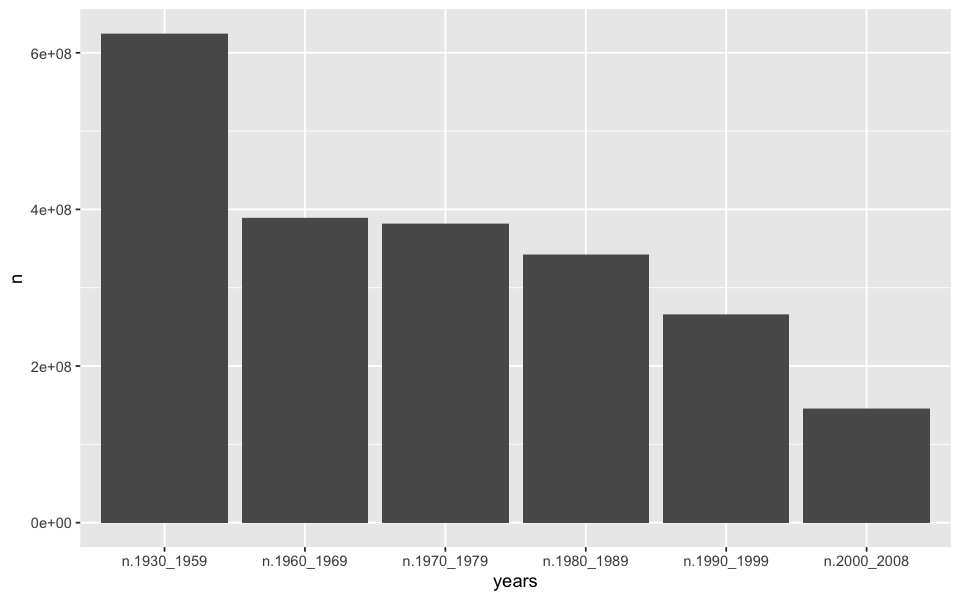

In [ ]:
givenname %>% 
    pivot_longer(n.1930_1959:n.2000_2008, names_to="years", values_to="n") %>% 
    mutate(years = factor(years, ordered=T)) %>% 
    ggplot(aes(x=years, y=n)) + geom_col()

## How common is my name over time?

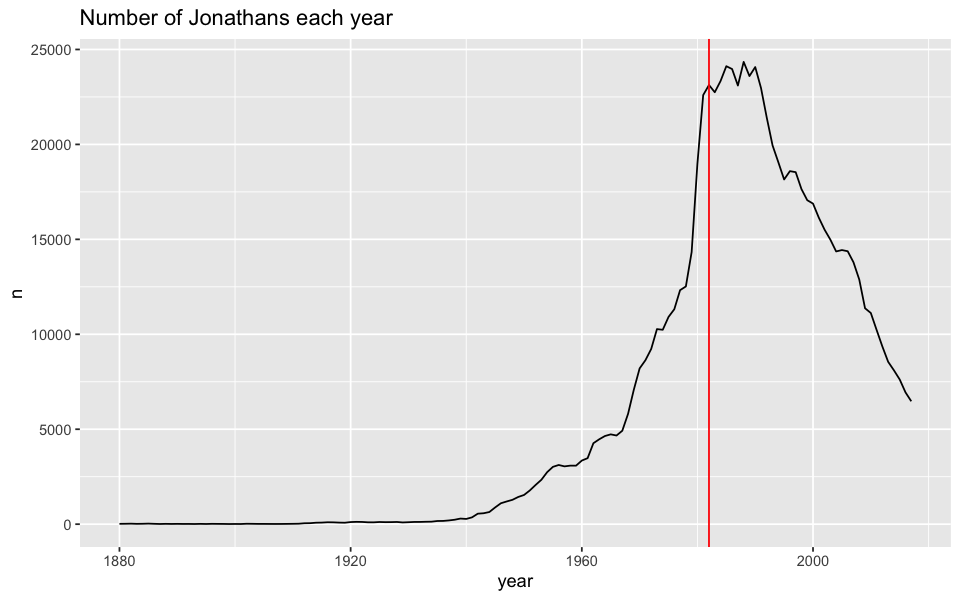

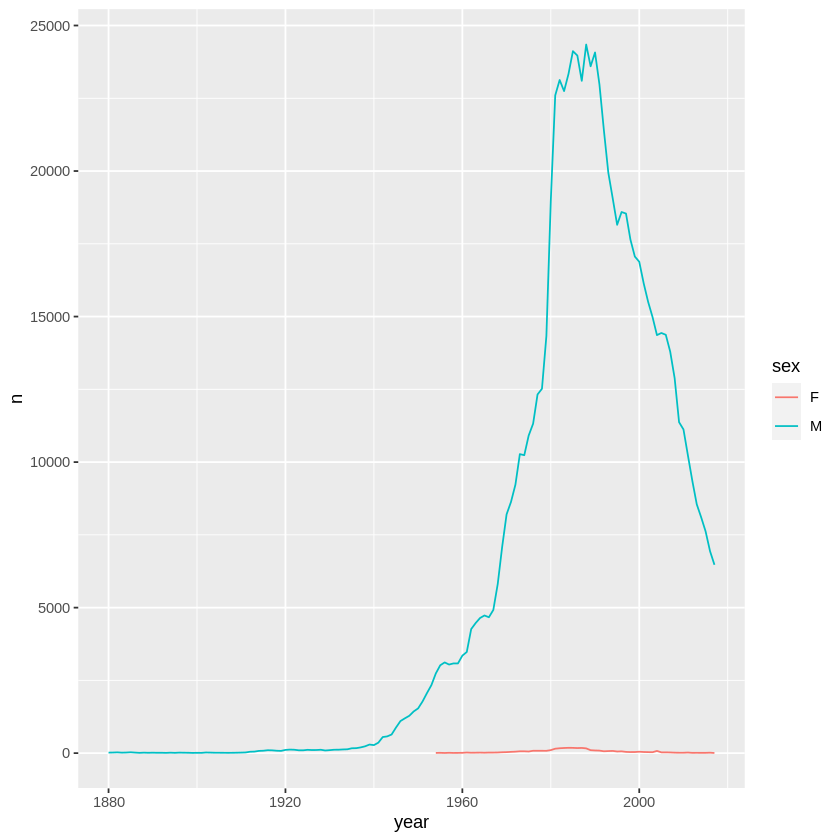

In [ ]:
# Plot my name over time
babynames %>% 
  filter(name == 'Jonathan') %>%
    ggplot(aes(x = year, y = n, color = sex)) +
    geom_line()

In [ ]:
glimpse(babynames)

Rows: 1,924,665
Columns: 5
$ year <dbl> 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880,…
$ sex  <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ name <chr> "Mary", "Anna", "Emma", "Elizabeth", "Minnie", "Margaret", "Ida",…
$ n    <int> 7065, 2604, 2003, 1939, 1746, 1578, 1472, 1414, 1320, 1288, 1258,…
$ prop <dbl> 0.07238359, 0.02667896, 0.02052149, 0.01986579, 0.01788843, 0.016…


In [ ]:
# Plot my name and my neighbor/friend/girlfriend's name

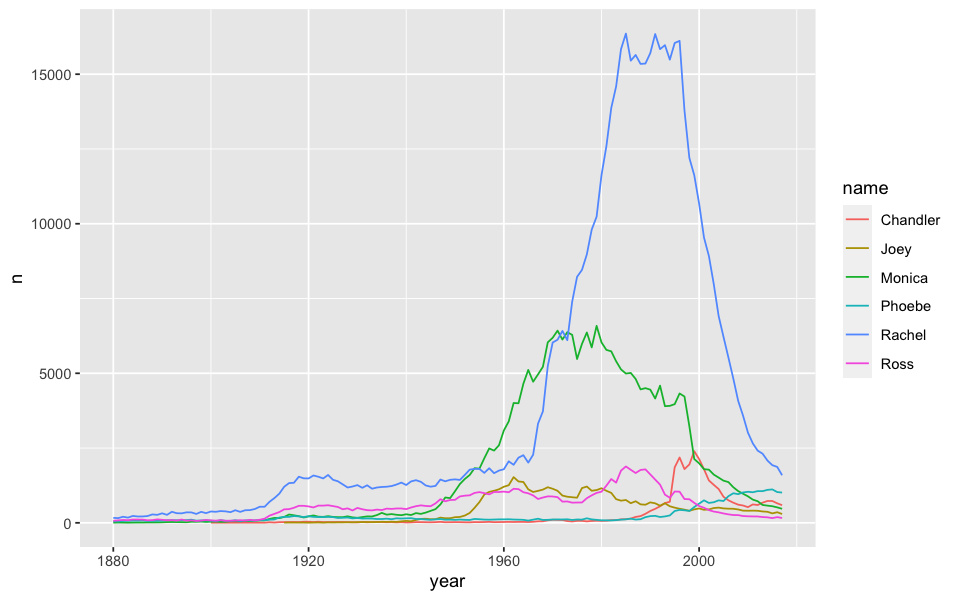

## Names from other countries
Obviously a large number of people in the class were not born in the US and do not have English names. A similar dataset on Chinese names is available from the `ChineseNames` package:

In [ ]:
# install.packages("ChineseNames")
library(ChineseNames)

This package contains an `givenname` table containing naming frequency for (single-character) given names:

In [ ]:
givenname %>% top_n(5, n.female)

character,pinyin,bihua,n.male,n.female,name.gender,n.1930_1959,n.1960_1969,n.1970_1979,n.1980_1989,⋯,ppm.1980_1989,ppm.1990_1999,ppm.2000_2008,name.ppm,name.uniqueness,corpus.ppm,corpus.uniqueness,name.valence,name.warmth,name.competence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
兰,lan2,5,652920,24861769,-0.9488201,13805295,5312327,3364874,1903020,⋯,9193.333,5395.524,2450.622,17010.05,1.769269,191.5842,3.715379,4.1875,3.9,3.5
丽,li4,7,359797,20528424,-0.9655502,1661782,2957007,5277436,6708350,⋯,32407.488,20527.613,9257.589,17840.82,1.748561,149.2029,3.823322,4.2500,3.6,3.0
秀,xiu4,7,2050069,29968210,-0.8719438,16660338,7064595,4823078,2242688,⋯,10834.242,5808.655,2842.289,21487.49,1.667794,149.6530,3.822022,4.0625,4.0,3.6
英,ying1,8,2129955,38849711,-0.8960482,21309061,8568501,6588993,3019930,⋯,14589.034,6768.631,3604.622,27444.92,1.561522,422.6557,3.372987,4.1250,3.6,3.4
玉,yu4,5,9692197,24546985,-0.4338535,14771006,7306823,5336682,3390050,⋯,16377.053,14296.357,11294.700,24860.19,1.604478,173.0625,3.759295,4.3750,4.2,3.4


This table is in so-called "wide format" and has to be reshaped to analyze names over time. We'll learn how to do this next week. In the meantime, you can run:

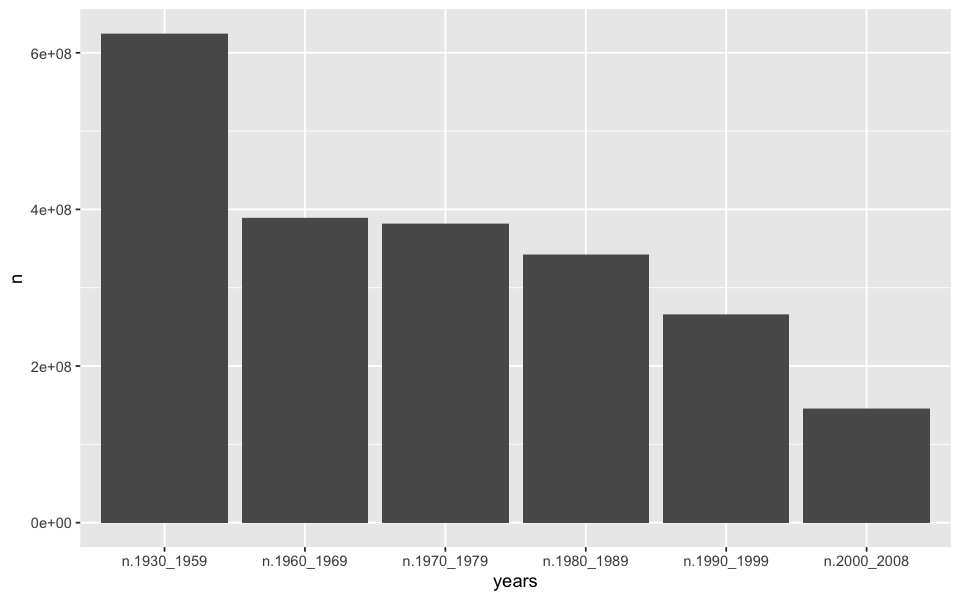

In [ ]:
givenname %>% 
    pivot_longer(n.1930_1959:n.2000_2008, names_to="years", values_to="n") %>% 
    mutate(years = factor(years, ordered=T)) %>% 
    ggplot(aes(x=years, y=n)) + geom_col()

## Eternal names
The most common name each year is:

In [ ]:
group_by(babynames, year, sex) %>% top_n(1) %>% print

Selecting by prop


# A tibble: 276 × 5
# Groups:   year, sex [276]
    year sex   name      n   prop
   <dbl> <chr> <chr> <int>  <dbl>
 1  1880 F     Mary   7065 0.0724
 2  1880 M     John   9655 0.0815
 3  1881 F     Mary   6919 0.0700
 4  1881 M     John   8769 0.0810
 5  1882 F     Mary   8148 0.0704
 6  1882 M     John   9557 0.0783
 7  1883 F     Mary   8012 0.0667
 8  1883 M     John   8894 0.0791
 9  1884 F     Mary   9217 0.0670
10  1884 M     John   9388 0.0765
# … with 266 more rows


We see that Mary and John were extremely popular names in the late 19th century.

## &#129300; Quiz

Call a name *eternal* if it is among the most 30 common names for its gender in *every* year of data. 

John is eternal, but Mary is not. Including John there are four eternal boy names, and one eternal girl name. 

What is the eternal girl's name?

<ol style="list-style-type: upper-alpha;">
    <li>Anna</li>
    <li>Elizabeth</li>
    <li>Khloe</li>
    <li>Spike</li>
    <li>Margaret</li>
</ol>

In [ ]:
# the eternal names

## Naming trends driven by migration
What fraction of male names ended in "o", or female names in "a", over time?

To tackle this problem, we're going to need a way to extract the last character of a name. We will learn how to do this after the midterm when we study strings and text data. For now, you may use the following command:

In [6]:
babynames %>% 
  filter(str_sub(name, -1) == 'o') %>%
    head

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Cleo,17,0.00017417
1880,F,Theo,7,0.00007172
1880,F,Leo,6,0.00006147
1880,M,Otto,271,0.00228885
1880,M,Leo,147,0.00124155
1880,M,Alonzo,122,0.00103041


In [ ]:
# What fraction of male names ended in o, or female names in a, over time?

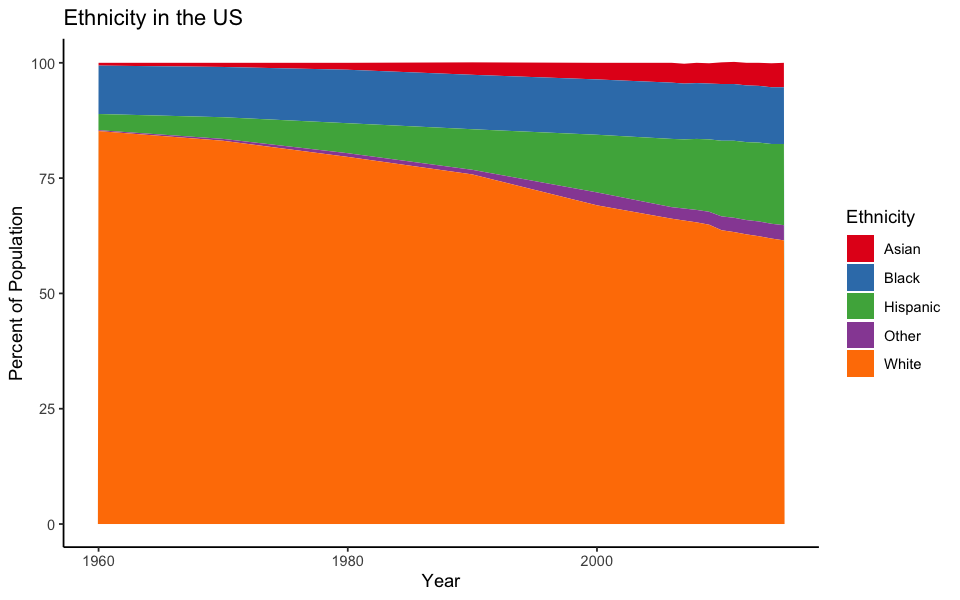

In [ ]:
# code for this plot
library(htmltab)
url <- "https://www.pewresearch.org/hispanic/2017/09/18/2015-statistical-information-on-hispanics-in-united-states/"
htmltab(url, which=3) %>% gather(key="Ethnicity", value="Percent of Population", -1) %>% 
      mutate("Percent of Population" = as.numeric(str_sub(`Percent of Population`, end = -2)),
             Year = as.integer(Year)) %>% 
      ggplot + geom_area(aes(x=Year, y=`Percent of Population`, fill=`Ethnicity`)) +
      theme_classic() + scale_fill_brewer(palette = "Set1")  + labs(title="Ethnicity in the US")